In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln, betaln, beta, betainc

In [2]:
def log_beta_pdf(x, a, b):
    
    y = - betaln(a,b) + np.log(x) * (a-1) + np.log(1-x) * (b-1)
    idx = np.where(x == 0)
    if a==1:
        #y[idx] = - gammaln(a) - gammaln(b) + gammaln(a+b)
        y[idx] = - betaln(a,b)
    elif a<1:
        y[idx] = np.Inf
    else:
        y[idx] = - np.Inf
    
    idx = np.where(x == 1)
    if b==1:
        y[idx] = - betaln(a,b)
    elif b<1:
        y[idx] = np.Inf
    else:
        y[idx] = - np.Inf
    return y


def beta_inc(x, a, b):
    return beta(a, b) * betainc(a, b, x)


def beta_pdf_inc(x, a, b, lower, upper):
    beta_ab = beta(a, b)
    z = np.log(beta_ab - (beta_inc(lower, a, b) + (beta_ab - beta_inc(upper, a, b))))
    loglikelihood = (a-1) * np.log(x) + (b-1) * np.log(1-x)
    return np.exp(loglikelihood-z)

----

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


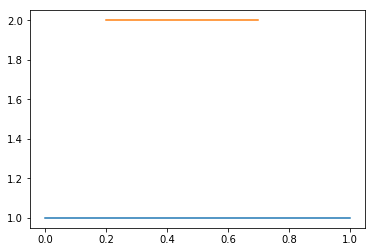

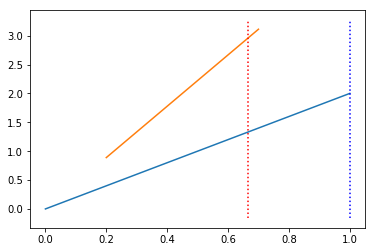

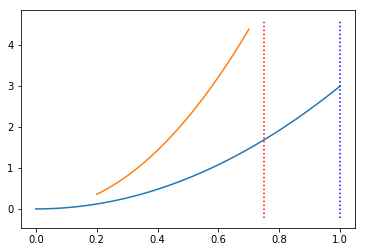

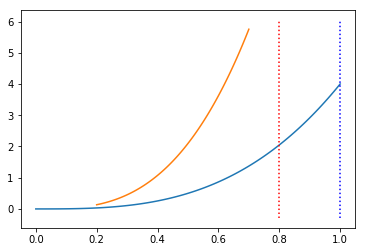

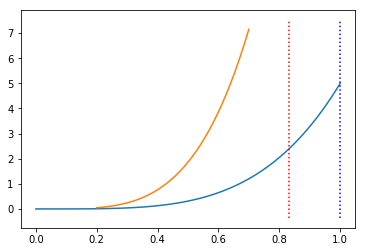

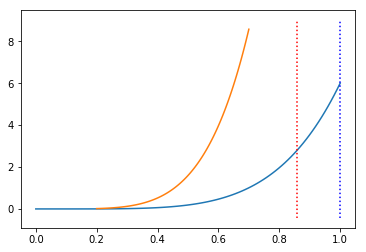

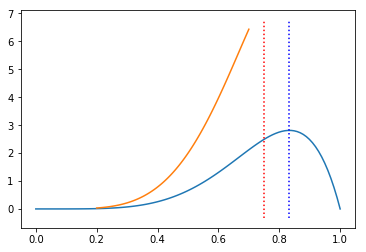

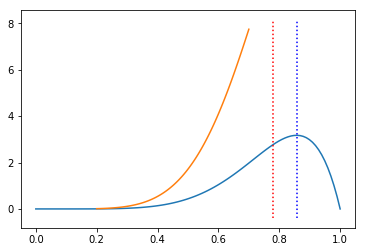

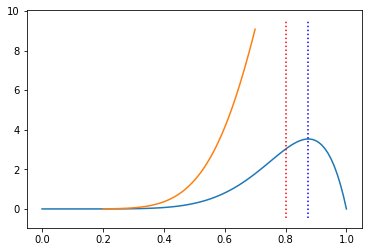

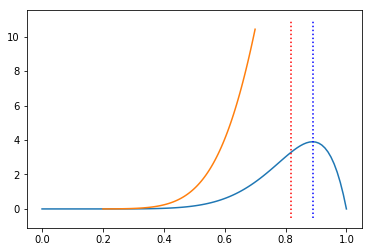

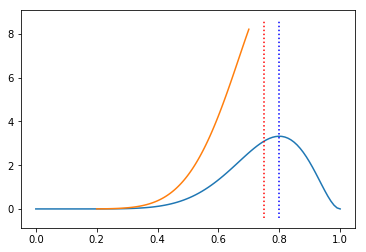

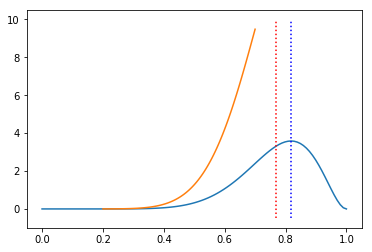

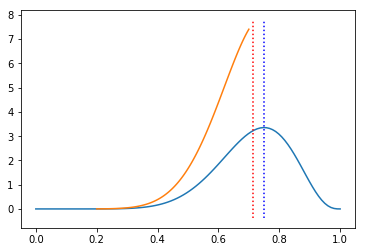

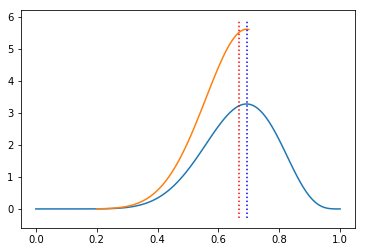

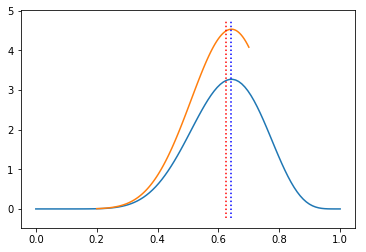

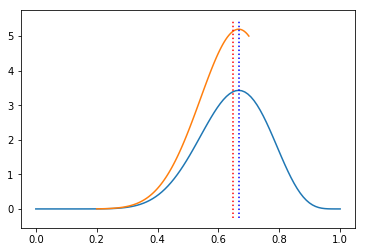

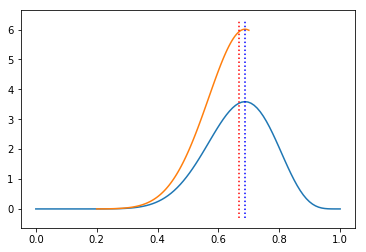

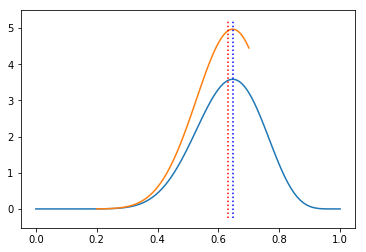

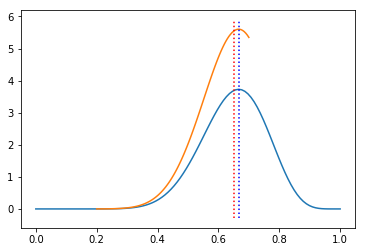

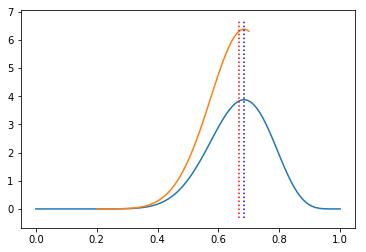

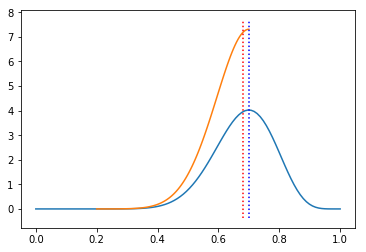

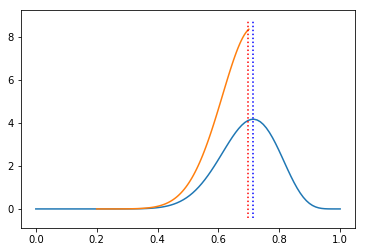

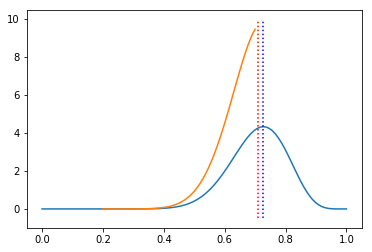

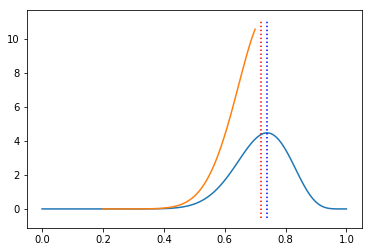

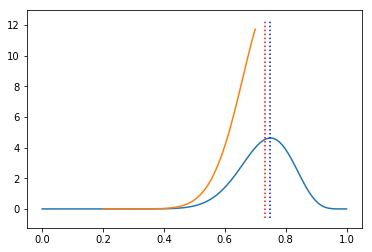

In [3]:
a = 1
b = 1

xx = [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
p = np.linspace(0.0, 1.0, 100)
p_2 = np.linspace(0.2, 0.7, 100)
c = [0, 0] # yazi, tura
N = 0

prior = np.exp(log_beta_pdf(p, a, b))
prior_2 = beta_pdf_inc(a=a, b=b, lower=0.2, upper=0.7, x=p_2)
plt.plot(p, prior)
plt.plot(p_2, prior_2)

for x in xx:
    c[x] += 1
    N += 1
    
    post = np.exp(log_beta_pdf(p, a+c[1], b+c[0]))
    post_2 = beta_pdf_inc(a=a+c[1], b=b+c[0], lower=0.2, upper=0.7, x=p_2)
    pi_E = (a + c[1]) / (a+b+N)
    pi_MODE = (a+c[1]-1) / (a+b+N-2)
    plt.figure()
    plt.plot(p, post)
    plt.plot(p_2, post_2)
    yl = plt.gca().get_ylim()
    plt.plot([pi_MODE, pi_MODE], yl, 'b:')
    plt.plot([pi_E, pi_E], yl, 'r:')
    
    plt.show()